# Triple doubles and basketball stats

- toc: false
- branch: master
- badges: true
- comments: false
- categories: [basketball, data science]

Russell Westbrook has tied Oscar Robertson in triple doubles, but maybe we can take a look at how those triple doubles differ.
How many of those triple doubles are 10/10/10? 14/14/14? 20/20/20? 

In [8]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 999)
from nba_api.stats.endpoints import leaguegamefinder, boxscoretraditionalv2, playergamelog, playergamelogs
from nba_api.stats.static import players

Using [nba_api](https://github.com/swar/nba_api) to find the game logs of some players who have logged many triple doubles.

Oscar Robertson played too early for his games to be logged, so we'll have to grab his logs elsewhere

In [68]:
westbrook = ("Russell Westbrook", players.find_players_by_full_name("westbrook")[0]['id'])
lbj = ("LeBron James", players.find_players_by_full_name("Lebron James")[0]['id'])
jokic = ("Nikola Jokic", players.find_players_by_full_name("Nikola Jokic")[0]['id'])
doncic = ("Luka Doncic", players.find_players_by_full_name("Luka Doncic")[0]['id'])
kidd = ("Jason Kidd", players.find_players_by_full_name("jason kidd")[0]['id'])

The triple double criteria, for convenience purposes will only look at PTS/REB/AST with the same numerical "cutoff" (all are 10+ or 15+, etc)

In [69]:
triple_doubles  = []
for player, playerid in [westbrook, lbj, jokic, doncic, kidd]:
    time.sleep(15)
    games = leaguegamefinder.LeagueGameFinder(
        player_id_nullable=playerid, season_type_nullable='Regular Season'
    ).league_game_finder_results.get_data_frame()
    for criteria in range(10,21):
        n_triple_doubles = len(games.query(
            f'PTS >= {criteria} & REB >= {criteria} & AST >= {criteria}'
        ))
        triple_doubles.append({
            'player': player,
            'cutoff': criteria,
            'n_triple_doubles': n_triple_doubles
        })

Robertson's game logs aren't available on stats.nba.com, but we can do some painstaking parsing of his [statmuse page](https://www.statmuse.com/nba/player/oscar-robertson-3116/game-log) into a separate csv

In [70]:
robertson = pd.read_csv("files/robertson_regularseason.csv")
for criteria in range(10,21):
    n_triple_doubles = len(robertson.query(
        f'PTS >= {criteria} & REB >= {criteria} & AST >= {criteria}'
    ))
    triple_doubles.append({
        'player': 'Oscar Robertson',
        'cutoff': criteria,
        'n_triple_doubles': n_triple_doubles
    })

The resultant dataframe is "long-form"

In [71]:
triple_double_df = pd.DataFrame(triple_doubles)

In [84]:
triple_double_df.head(2)

,player,cutoff,n_triple_doubles
0,Russell Westbrook,10,181
1,Russell Westbrook,11,122


Westbrook and Robertson both have 181 triple doubles (at this current moment in time), but Robertson has more 12+/12+/12+ games, and Westbrook has more 17+/17+/17+ games

/home/ayang41/miniconda3/envs/ds37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of triple doubles')

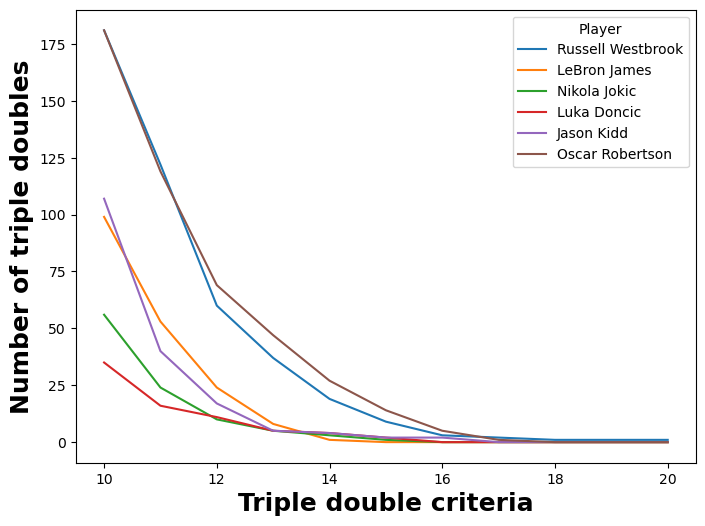

In [72]:
fig, ax = plt.subplots(1,1, dpi=100, figsize=(8,6))
linep = sns.lineplot(triple_double_df['cutoff'], triple_double_df['n_triple_doubles'],
                    hue=triple_double_df['player'])
linep.axes.legend(title='Player')
linep.axes.set_xlabel("Triple double criteria", weight='bold', size=18)
linep.axes.set_ylabel("Number of triple doubles", weight='bold', size=18)

Zoom in on the tail of the triple doubles, Oscar Robertson wins out on 16+/16+/16+ games but lags in 17+/17+/17+ games compared to Westbrook (his 20/20/21 game really stands out here)

In [83]:
triple_double_df[
    (triple_double_df['cutoff'] > 15) &
    (triple_double_df['player'].str.contains("Westbrook|Robertson", regex=True))
].pivot(index='player', columns='cutoff', values='n_triple_doubles')

cutoff,16,17,18,19,20
player,,,,,
Oscar Robertson,5,1,0,0,0
Russell Westbrook,3,2,1,1,1
